In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/train.csv", index_col="id")
df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [7]:
df.shape

(300000, 15)

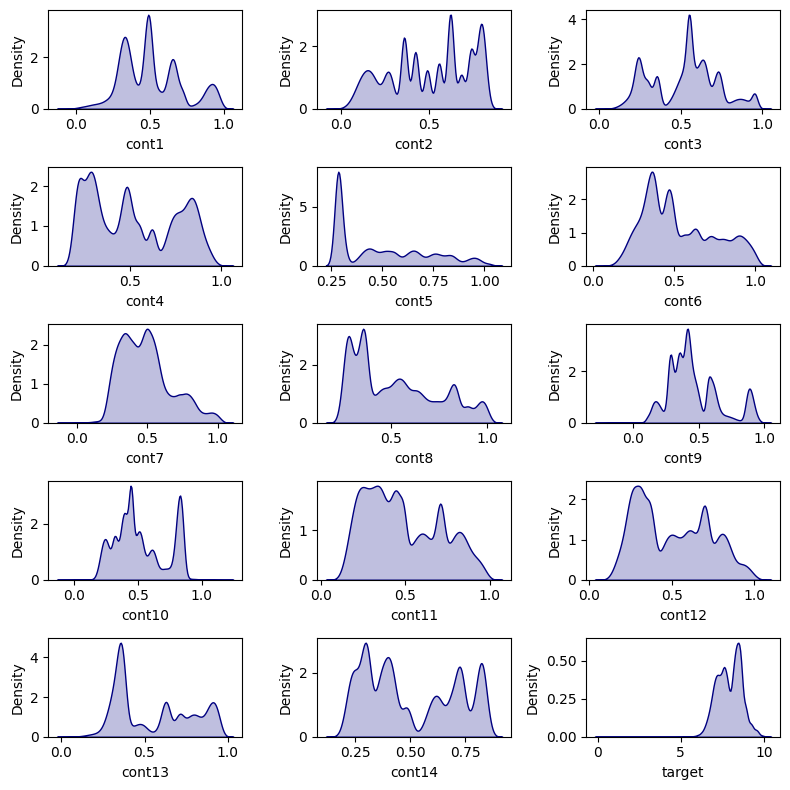

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,8))
cols = df.columns
i = 0
for r in range(5):
    for c in range(3):
        sns.kdeplot(data=df, x=cols[i], color="navy", fill=True, ax=axes[r,c])
        i = i + 1
plt.tight_layout()

In [10]:
x = df.iloc[:,:-1]
y = df["target"]

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.3, random_state=123)

In [22]:
from sklearn.preprocessing import StandardScaler
sca  = StandardScaler()
scaled_x_train = sca.fit_transform(xtrain)
scaled_x_valid = sca.transform(xvalid)

In [23]:
from sklearn.linear_model import SGDRegressor
linreg = SGDRegressor()
linreg.fit(scaled_x_train, ytrain)

SGDRegressor()

In [24]:
ypred = linreg.predict(scaled_x_valid)

In [25]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(yvalid, ypred))

0.726932939724319

In [26]:
error = yvalid - ypred

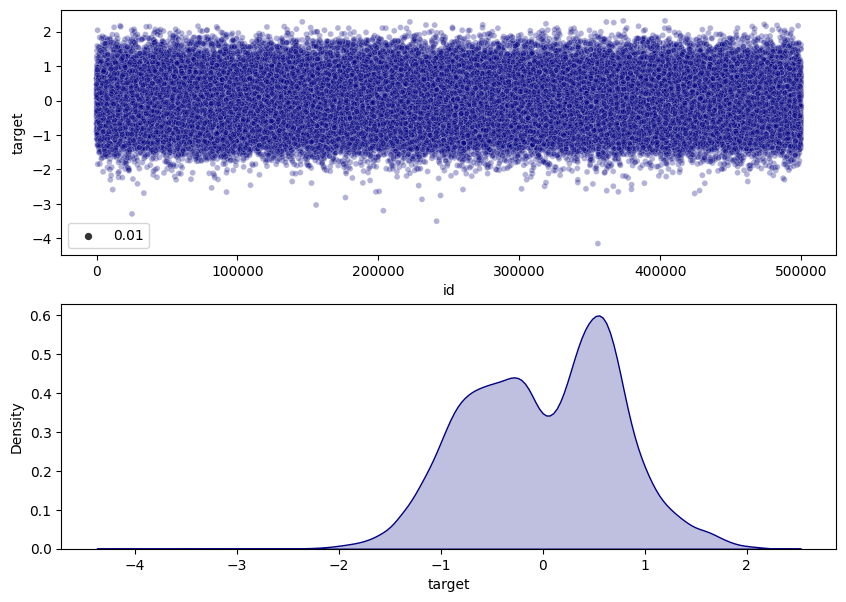

In [42]:
# error dignostics
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
sns.scatterplot(x=yvalid.index, y=error, color="navy", alpha= 0.3, size=0.01, ax=axes[0])
sns.kdeplot(error, color="navy", fill=True,  ax=axes[1]);

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [49]:
xtrain

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
368115,0.352193,0.077689,0.552905,0.256856,0.784567,0.327877,0.459018,0.529042,0.277590,0.430381,0.684137,0.688099,0.473071,0.226280
110440,0.504511,0.265548,0.649008,0.239160,0.281488,0.634618,0.847521,0.276330,0.462093,0.764292,0.728293,0.689614,0.718670,0.386444
123019,0.338662,0.420559,0.493494,0.492500,0.679627,0.303384,0.248314,0.765813,0.335326,0.246055,0.172691,0.252201,0.370205,0.306493
210872,0.311173,0.799029,0.942224,0.274616,0.281043,0.463503,0.545428,0.537556,0.381139,0.303613,0.443353,0.513203,0.214065,0.228306
318925,0.354170,0.358183,0.464613,0.213160,0.805478,0.299928,0.335750,0.275957,0.140336,0.226460,0.178354,0.248241,0.362081,0.302295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320730,0.847519,0.787527,0.368909,0.623608,0.973143,0.896893,0.623545,0.998751,0.858322,0.871949,0.816364,0.823080,0.826632,0.469523
29380,0.765661,0.265168,0.176839,0.683024,0.281265,0.866411,0.524634,0.824365,0.570853,0.817346,0.611215,0.841373,0.887673,0.762777
46494,0.244457,0.622818,0.564583,0.487335,0.282296,0.455236,0.328241,0.480820,0.205737,0.406495,0.273403,0.296432,0.638631,0.402290


In [56]:
error[error > -2]

id
464627    0.637634
39089     0.885258
55653    -0.625475
97456    -0.636656
337031   -0.245290
            ...   
367670   -1.028617
322871    0.826880
334633    0.176065
135538    0.973633
235023   -0.426054
Name: target, Length: 89862, dtype: float64